In [1]:
%matplotlib inline
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn.metrics as metrics
import pydotplus 
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image
import pydotplus 
from sklearn import preprocessing

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('data/Data.csv', sep = '\t', encoding = 'utf-8')

In [4]:
active = df[df['Subscription']>0]

In [5]:
active.shape

(133419, 82)

In [7]:
active = active.reset_index()

In [8]:
active.columns.values

array(['index', 'Unnamed: 0', 'Athlete', 'Subscription', 'Month', 'gender',
       'sport', 'SegmentName', 'Duration', 'EventsAttended',
       'EventsAttended_Frequency', 'EventsAttended_LastDate',
       'EventsAttended_Recency', 'Hits', 'Hits_Frequency', 'Hits_LastDate',
       'Hits_Recency', 'Hprofileview', 'Hcoachimport', 'Hmessage',
       'Hsearchhit', 'HNULL', 'Hcoacheval', 'Hvideoview', 'Hemailopen',
       'Emails', 'Emails_Frequency', 'Emails_LastDate', 'Emails_Recency',
       'EAthlete newsletter', 'Eathlete_new', 'Eathlete_new_info_request',
       'ECCNote', 'ECCNote_camp', 'Ecoach_list_known_updated',
       'ECoachEmailOpen', 'ECoachEval', 'ECoachImport', 'ECoachSearchHit',
       'ECoachVideoViewHit', 'ECoachVisit', 'Ecolleges_going_to_the_event',
       'Efailed_subscription', 'Ehighlight_video__regathlete_11',
       'Ehighlight_video__regathlete_2', 'Ehighlight_video__regathlete_4',
       'EEmailsDigest', 'Eparent_new', 'Eparent_welcome',
       'Epost_event_emai

In [96]:
active.head(5)

,index,Athlete,Subscription,Month,gender,sport,SegmentName,Duration,EventsAttended,EventsAttended_Frequency,...,subscription_Ended,Subscriptions_EOM,RecencyNow,RecencyStat,AthleteRecordNumber,created_at,updated_at,status,ID,AthleteSub
0,0,215018,617124,Jul-2013,F,softball,NaN,37.0,0,0,...,0,0,1187,0,19,2013-07-03 20:45:00,2013-08-09 21:49:00,NaN,19,2150181
1,1,215018,617124,Aug-2013,F,softball,NaN,37.0,0,0,...,1,0,1156,0,20,2013-07-03 20:45:00,2013-08-09 21:49:00,NaN,20,2150181
2,2,215069,241447,Jan-2012,F,soccer,NaN,851.0,2,2,...,0,0,1734,40907,1,2012-01-01 16:43:00,2014-05-01 09:52:00,NaN,57,2150690
3,3,215069,241447,Feb-2012,F,soccer,NaN,851.0,0,2,...,0,0,1703,40907,2,2012-01-01 16:43:00,2014-05-01 09:52:00,NaN,58,2150690
4,4,215069,241447,Mar-2012,F,soccer,NaN,851.0,0,2,...,0,0,1674,40907,3,2012-01-01 16:43:00,2014-05-01 09:52:00,NaN,59,2150690


In [9]:
active.drop(['index', 'Unnamed: 0'], axis=1,inplace = True)

In [10]:
active.rename(columns={'level_0':'index'},inplace=True)

133401
Mean: 375.13
Variance: 59659.15
Percent values missing: 0.000000%


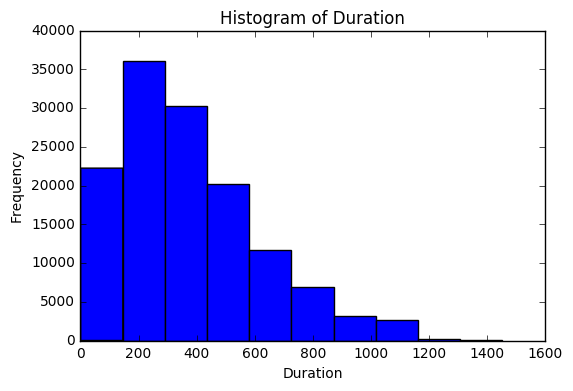

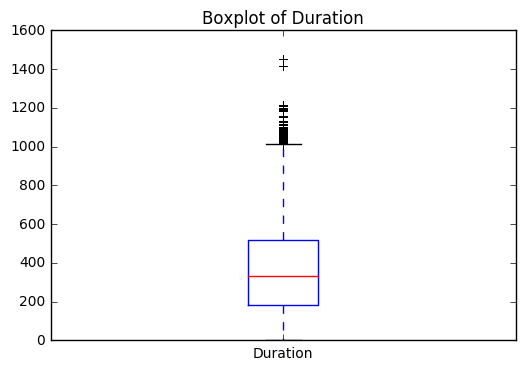

In [11]:
features = [feature for feature in active.columns.values]

features_dropdown = widgets.Dropdown(
    options=features,
    value='EventsAttended',
    description='Feature',
    disabled=False,
    button_style='info'
)

categorical_features = [cat_feature for cat_feature in active.columns.values if active[cat_feature].dtype == 'object']
#categorical_features.extend(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 
#                             'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
#                             'TotRmsAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold'])


def display_stats(feature):
    
    if feature in categorical_features:
        stringified = active[feature].apply(lambda x: str(x)).values
        print("Percent values missing: %f%%" % (100*(np.sum(stringified == 'nan') / len(active[feature].values))))
        
        nan_indices = np.where(stringified == 'nan')[0]
        stringified = np.delete(stringified, nan_indices)
        
        labels = np.unique(stringified)
        data = [np.sum(stringified == l) for l in labels]
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Visualization of %s' % feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        if feature == 'MoSold':
            labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        ax.bar(range(len(data)), data, tick_label=labels)
        #ax.xticks(range(len(lables)), labels)
        plt.show()
    else:
        x = active[feature].values
    
        #find zero indices
        zero_indices = np.where(x == 0)[0]
        nan_indices = np.where(np.isnan(x))[0]
        #delete these datapoints from x and y
    
        x = np.delete(x, zero_indices)
        x = np.delete(x, nan_indices)
        print(len(x))
        y = np.arange(0, len(x), 1);
        #y = active['index']
        
        print('Mean: %.2f' % np.mean(x))
        print('Variance: %.2f' % np.var(x))
        # we don't count zeros as missing
        print('Percent values missing: %f%%' % (100*((len(nan_indices)) / len(active[feature].values))))
    
        fig1 = plt.figure(1)
        ax1 = fig1.add_subplot(1, 1, 1)
        ax1.set_title('Histogram of %s' % feature)
        ax1.set_xlabel(feature)
        ax1.set_ylabel('Frequency')
        ax1.hist(x)
        
        fig2 = plt.figure(2)
        ax2= fig2.add_subplot(1, 1, 1)
        ax2.set_title('Boxplot of %s' % feature)
        ax2.boxplot([list(x)], labels=[feature])
        plt.show()

widgets.interact(display_stats, feature=features_dropdown)